In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split # train, test로 나눠주고 셔플해주는 라이브러리
from sklearn import metrics # 평가
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import seaborn as sns # 시각화 라이브러리

### 1. 문제 정의
- 생존자/사망자를 예측
- Kaggle 사이트에서 높은순위 차지하기
- 머신러닝 전체과정 체험

### 2. 데이터 수집
- Kaggle 사이트로 train, test 다운로드

#### Question1
- 타이타닉 train데이터와 test데이터를 변수 train, test에 저장하세요(단, 인덱스는 PassengerID를 사용 할 것.)

In [2]:
train = pd.read_csv('data/train.csv', index_col = 'PassengerId') 
test = pd.read_csv('data/test.csv', index_col = 'PassengerId')

In [3]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


### 3. 데이터 전처리

#### 결측치 확인

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- train 결측치 = Age, Cabin, Embarked
- test 결측치 = Age, Fare, Cabin

#### Age 채우기
- 단순 기술통계치로 채우지 않고 다른 컬럼과의 상관관계를 이용해 결측치를 채워보자.
- Age와 다른 컬럼간의 상관관계 알아보자.

In [7]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Pclass가 가장 높은 상관관계를 갖는다.
- 생존에 관련이 많을것 같은 성별을 함께 그룹핑하여 활용

In [9]:
pt1 = train.pivot_table(values = 'Age',
                           index = ['Pclass', 'Sex'],
                               aggfunc = 'mean')
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

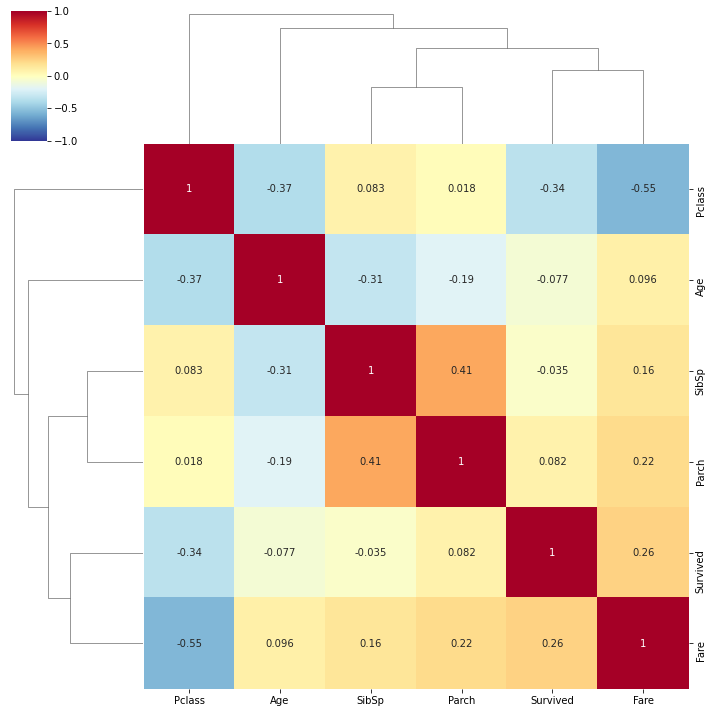

In [10]:
sns.clustermap(train.corr(), 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [11]:
pt1.loc[1, 'female']

Age    34.611765
Name: (1, female), dtype: float64

In [12]:
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [13]:
def fill_age(df):
    # 만약 나이가 결측치라면 피봇테이블에서 값을 가져와서 채운다.
    if np.isnan(df['Age']): # 결측치다
        return pt1.loc[df['Pclass'],df['Sex']]
    # 만약 나이가 결측치가 아니라면 원래 나이 값을 사용하자.
    else:
        return df['Age']

In [14]:
train['Age'] = train.apply(fill_age, axis = 1).astype('int64')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [16]:
test['Age'] = test.apply(fill_age, axis = 1).astype('int64') 

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### Embarked 채우기

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [19]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [21]:
# 결측치를 소괄호 안에 있는 값으로 채워준다
train['Embarked'] = train['Embarked'].fillna('S')

#### Fare 채우기

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [23]:
test['Fare'].mean()

35.6271884892086

In [24]:
test['Fare'] = test['Fare'].fillna(35.6271884892086)

#### Cabin 채우기

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [26]:
train['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C87            1
A24            1
B82 B84        1
C45            1
D46            1
Name: Cabin, Length: 147, dtype: int64

In [27]:
train['Deck'] = train['Cabin'].fillna('N')
test['Deck'] = test['Cabin'].fillna('N')

In [28]:
train['Deck'].value_counts()

N              687
G6               4
B96 B98          4
C23 C25 C27      4
F33              3
              ... 
C87              1
A24              1
B82 B84          1
C45              1
D46              1
Name: Deck, Length: 148, dtype: int64

In [29]:
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [30]:
train.drop('Cabin', inplace = True, axis = 1)
test.drop('Cabin', inplace = True, axis = 1)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### EDA(데이터 탐색)
- train 데이터 탐색
- test를 탐색하는 것은 모델 일반화에 도움이 되지 않음.

#### Deck 시각화

In [33]:
train_deck = train[['Deck', 'Survived', 'Name']].groupby(['Deck', 'Survived']).count()

In [34]:
train_deck

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
N    0          481
     1          206
T    0            1

- N에서 상대적으로 사람이 많이 죽었다.

#### Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

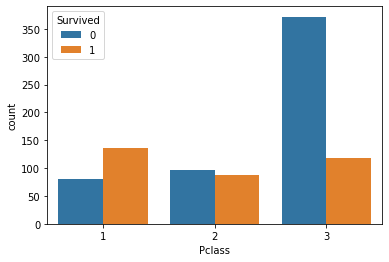

In [35]:
sns.countplot(data=train, x='Pclass', hue = 'Survived')

- 3등석 사람들이 많이 죽었다.

#### Question2
- 성별과 생존간의 관계
- Embarked와 생존간의 관계를 시각화해보자

<AxesSubplot:xlabel='Sex', ylabel='count'>

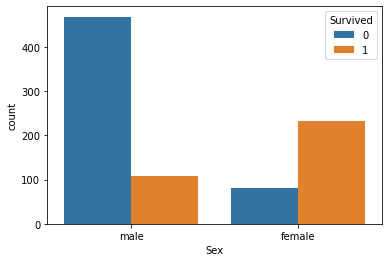

In [36]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

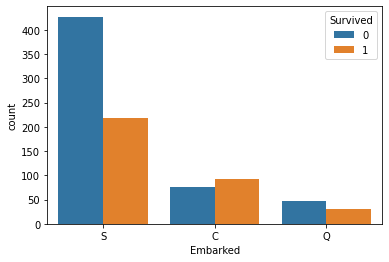

In [37]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

- Embarked가 S에 해당하는 사람이 많이 죽었다.

### 수치형 데이터

#### Age 시각화

<AxesSubplot:xlabel='Sex', ylabel='Age'>

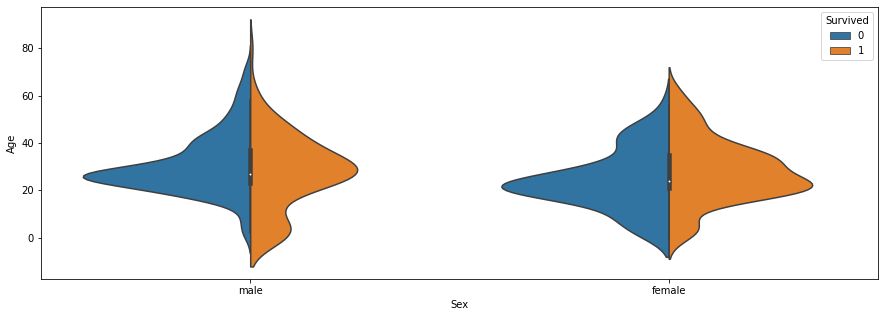

In [38]:
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Age',
              hue = 'Survived',
              split = True)

- 20~40대 사이의 사람이 많이 사망했다.
- 10세이하 중에서는 남자아이가 여자아이에 비해 많이 살았다.

#### Fare 시각화

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

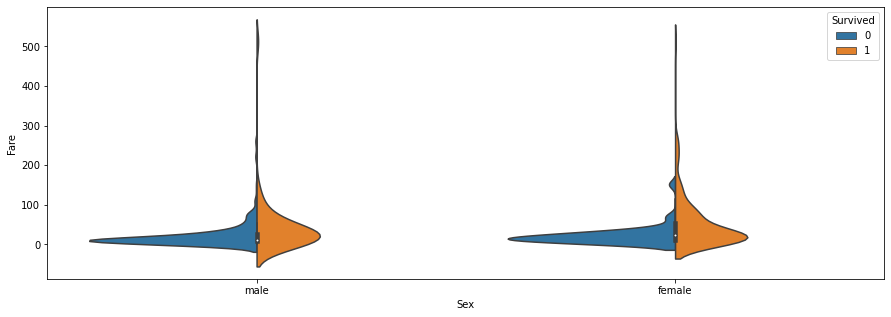

In [39]:
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Fare',
              hue = 'Survived',
              split = True)

#### - 요금이 싼사람은 상대적으로 많이 죽었다.

#### Parch, SibSp - 부모자식, 형제배우자

In [40]:
train['Family'] = train['Parch'] + train['SibSp'] + 1
test['Family'] = test['Parch'] + test['SibSp'] + 1

<AxesSubplot:xlabel='Family', ylabel='count'>

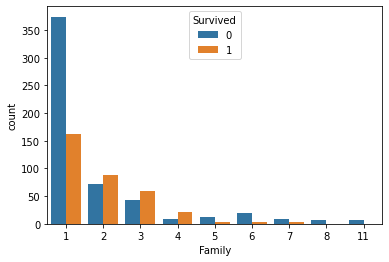

In [41]:
sns.countplot(data = train, x = 'Family', hue='Survived')

- 1명일때는 죽은비율이 높고, 2~4명일때는 생존비율이 높고, 5명이상이면 죽은비율이 높다.

- 가족의 수가 1이면 Alone, 2~4면 Small, 5이상이면 Large

In [42]:
bins = [0,1,4,11] # 구간만들기
labels = ['Alone', 'Small', 'Large']
train['Family'] = pd.cut(train['Family'], bins = bins, labels = labels)
test['Family'] = pd.cut(test['Family'], bins = bins, labels = labels)

<AxesSubplot:xlabel='Family', ylabel='count'>

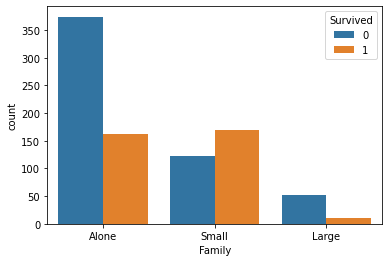

In [43]:
sns.countplot(data = train, x = 'Family', hue = 'Survived')

#### Text 데이터 다루기

In [44]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [45]:
train['Name'].iloc[0].split(',')[1].split('.')[0].strip()

'Mr'

In [46]:
def split_title(row):
    return row.split(',')[1].split('.')[0].strip()

In [47]:
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

<AxesSubplot:xlabel='Title', ylabel='count'>

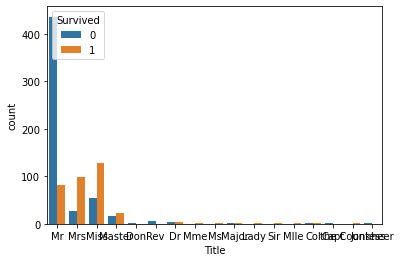

In [48]:
sns.countplot(data = train, x='Title', hue = 'Survived')

<AxesSubplot:xlabel='Title', ylabel='count'>

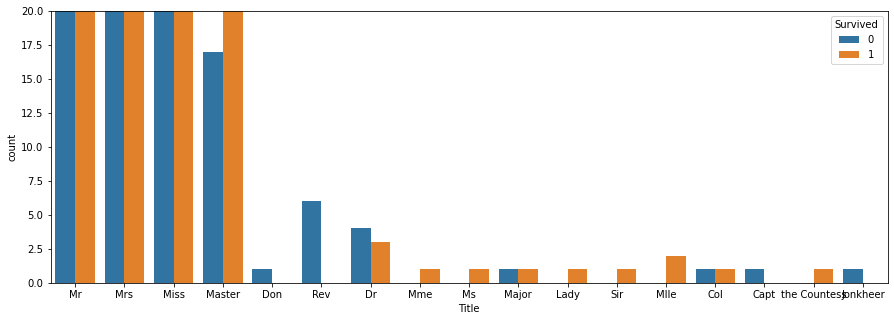

In [49]:
plt.figure(figsize = (15,5))
plt.ylim(0, 20)
sns.countplot(data = train, x = 'Title', hue = 'Survived')

- Master : 결혼하지 않은 남성, 주로 청소년 이하
- Rev : 목사님 (6명 모두 죽음)

In [50]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [51]:
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

In [52]:
len(title)

17

In [53]:
c_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'] + ['Other'] * 11

In [54]:
c_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Other',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [55]:
len(c_title)

17

In [56]:
title_dic = dict(zip(title, c_title))

In [57]:
title_dic

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Don': 'Other',
 'Rev': 'Rev',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [58]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Deck', 'Family', 'Title'],
      dtype='object')

In [59]:
train['Title'] = train['Title'].map(title_dic)

In [60]:
test['Title'] = test['Title'].map(title_dic)

In [61]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [62]:
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

#### 티켓

In [63]:
train.drop('Ticket', axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Age       891 non-null    int64   
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    object  
 8   Deck      891 non-null    object  
 9   Family    891 non-null    category
 10  Title     891 non-null    object  
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 117.5+ KB


### 인코딩

In [65]:
y_train = train['Survived']
X_train = train.drop('Survived', axis = 1)
X_test = test

In [66]:
X_train.shape

(891, 10)

In [67]:
y_train.shape

(891,)

In [68]:
X_test.shape

(418, 10)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    int64   
 1   Sex       891 non-null    object  
 2   Age       891 non-null    int64   
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Fare      891 non-null    float64 
 6   Embarked  891 non-null    object  
 7   Deck      891 non-null    object  
 8   Family    891 non-null    category
 9   Title     891 non-null    object  
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 110.6+ KB


In [70]:
cat_feature = ['Sex', 'Embarked','Deck','Family', 'Title']

In [71]:
for i in cat_feature:
    dummy = pd.get_dummies(train[i], prefix = i)
    X_train = pd.concat([X_train, dummy], axis = 1)
    X_train.drop(i, axis=1, inplace = True)

In [72]:
for i in cat_feature:
    dummy = pd.get_dummies(test[i], prefix = i)
    X_test = pd.concat([X_test, dummy], axis = 1)
    X_test.drop(i, axis=1, inplace = True)

In [73]:
type(X_train.columns)

pandas.core.indexes.base.Index

In [74]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    int64  
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   Sex_female    418 non-null    uint8  
 6   Sex_male      418 non-null    uint8  
 7   Embarked_C    418 non-null    uint8  
 8   Embarked_Q    418 non-null    uint8  
 9   Embarked_S    418 non-null    uint8  
 10  Deck_A        418 non-null    uint8  
 11  Deck_B        418 non-null    uint8  
 12  Deck_C        418 non-null    uint8  
 13  Deck_D        418 non-null    uint8  
 14  Deck_E        418 non-null    uint8  
 15  Deck_F        418 non-null    uint8  
 16  Deck_G        418 non-null    uint8  
 17  Deck_N        418 non-null    uint8  
 18  Family_Alone  418 non-null 

In [75]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    int64  
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   Sex_female    418 non-null    uint8  
 6   Sex_male      418 non-null    uint8  
 7   Embarked_C    418 non-null    uint8  
 8   Embarked_Q    418 non-null    uint8  
 9   Embarked_S    418 non-null    uint8  
 10  Deck_A        418 non-null    uint8  
 11  Deck_B        418 non-null    uint8  
 12  Deck_C        418 non-null    uint8  
 13  Deck_D        418 non-null    uint8  
 14  Deck_E        418 non-null    uint8  
 15  Deck_F        418 non-null    uint8  
 16  Deck_G        418 non-null    uint8  
 17  Deck_N        418 non-null    uint8  
 18  Family_Alone  418 non-null 

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        891 non-null    int64  
 1   Age           891 non-null    int64  
 2   SibSp         891 non-null    int64  
 3   Parch         891 non-null    int64  
 4   Fare          891 non-null    float64
 5   Sex_female    891 non-null    uint8  
 6   Sex_male      891 non-null    uint8  
 7   Embarked_C    891 non-null    uint8  
 8   Embarked_Q    891 non-null    uint8  
 9   Embarked_S    891 non-null    uint8  
 10  Deck_A        891 non-null    uint8  
 11  Deck_B        891 non-null    uint8  
 12  Deck_C        891 non-null    uint8  
 13  Deck_D        891 non-null    uint8  
 14  Deck_E        891 non-null    uint8  
 15  Deck_F        891 non-null    uint8  
 16  Deck_G        891 non-null    uint8  
 17  Deck_N        891 non-null    uint8  
 18  Deck_T        891 non-null    

In [77]:
X_train.drop('Deck_T', axis =1, inplace = True)

In [78]:
set(X_train.columns) - set(X_test.columns)

set()

### 학습

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
from sklearn.model_selection import cross_val_score

#### KNN 모델

In [82]:
knn_model = KNeighborsClassifier(n_neighbors = 6)

In [83]:
knn_model.fit(X_train, y_train)
pre = knn_model.predict(X_test)

In [84]:
result = cross_val_score(knn_model, 
                        X_train,
                        y_train,
                        cv = 5)
result

array([0.6424581 , 0.71348315, 0.70786517, 0.70786517, 0.71910112])

In [85]:
result.mean()

0.6981545414600465

#### KNN Scaler 적용

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
scaler.fit(X_train)

StandardScaler()

In [89]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[ 0.82737724, -0.5404969 ,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [-1.56610693,  0.66195688,  0.43279337, ...,  2.47547975,
        -0.15536387, -0.0823387 ],
       [ 0.82737724, -0.23988346, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       ...,
       [ 0.82737724, -0.61565027,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [-1.56610693, -0.23988346, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724,  0.21103671, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ]])

In [90]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[ 0.82737724,  0.36134344, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724,  1.33833714,  0.43279337, ...,  2.47547975,
        -0.15536387, -0.0823387 ],
       [-0.36936484,  2.46563756, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       ...,
       [ 0.82737724,  0.66195688, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724, -0.23988346, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724, -0.23988346,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ]])

In [91]:
result = cross_val_score(knn_model, 
                        transform_X_train,
                        y_train,
                        cv = 5)
result

array([0.81564246, 0.7752809 , 0.80898876, 0.79213483, 0.84269663])

In [92]:
result.mean()

0.8069487163392128

#### 결정트리(Decision Tree)

In [93]:
tree_model = DecisionTreeClassifier(max_depth = 7)

In [94]:
result = cross_val_score(tree_model, 
                        X_train,
                        y_train,
                        cv = 5)
result

array([0.7877095 , 0.78089888, 0.80898876, 0.78651685, 0.84831461])

In [95]:
result.mean()

0.80248571966606

### 앙상블

In [96]:
from sklearn.ensemble import VotingClassifier # 보팅 분류기
from sklearn.ensemble import RandomForestClassifier

In [97]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()

In [98]:
voting_model = VotingClassifier(
        estimators = [
            ('knn', knn_model),
            ('tree', tree_model),
            ('forest', forest_model)
        ],
    voting = 'hard'
)

In [99]:
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('tree', DecisionTreeClassifier()),
                             ('forest', RandomForestClassifier())])

In [100]:
pre = voting_model.predict(X_test)

#### 보팅의유형
- 하드보팅 : 최종 아웃풋 결과 중 각 모델들이 가장 많이 선택한 아웃풋을 최종선택한다.
- 소프트보팅 : 최종 아웃풋 결과의 확률값을 기반으로 평균을 내어, 가장 확률이 높은 아웃풋을 최종아웃풋으로 설정한다.

### 그리드서치

In [101]:
forest_model2 = RandomForestClassifier(n_estimators = 1000,
                                      max_features = 0.7,
                                      max_depth = 5,
                                      min_samples_leaf = 15,
                                      max_leaf_nodes = 50)

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid = {
    "max_depth" : [5, 10, 15, 20],
    "n_estimators" : [1000, 1500, 2000, 2500],
    "max_features" : [0.5, 0.7, 0.9],
    "max_leaf_nodes" : [20, 50, 80]
}

In [104]:
grid = GridSearchCV(forest_model2,
                   param_grid,
                   cv = 3)

In [105]:
grid.fit(X_train, y_train) 

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, max_features=0.7,
                                              max_leaf_nodes=50,
                                              min_samples_leaf=15,
                                              n_estimators=1000),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.5, 0.7, 0.9],
                         'max_leaf_nodes': [20, 50, 80],
                         'n_estimators': [1000, 1500, 2000, 2500]})

In [106]:
print('best score :', grid.best_score_)
print('best params :', grid.best_params_)

best score : 0.8260381593714928
best parmas : {'max_depth': 5, 'max_features': 0.5, 'max_leaf_nodes': 80, 'n_estimators': 2000}


In [107]:
final_forest_model = RandomForestClassifier(n_estimators = 2000,
                                      max_features = 0.5,
                                      max_depth = 5,
                                      min_samples_leaf = 15,
                                      max_leaf_nodes = 80)

In [108]:
final_forest_model.fit(X_train, y_train)
pre = final_forest_model.predict(X_test)

### 평가

In [190]:
result = pd.read_csv('data/gender_submission.csv')

In [191]:
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [192]:
result['Survived'] = pre

In [193]:
result.to_csv('HHD_submission_01.csv', index = False)